In [1]:
#第四章：Numpy基础：数组和矢量计算
#Numpy（Numerical python的简称）
import numpy as np
my_arr = np.arange(1000000)
my_list = list(range(1000000))
#性能差距，考察一个包含一百万整数的数组和一个等价的python列表
%time for _ in range(10): my_arr2 = my_arr*2

Wall time: 48.9 ms


In [3]:
%time for _ in range(10):my_list2 = [x*2 for x in my_list]
#基于Numpy的算法要比纯python快10-100倍，并且使用的内存更少

Wall time: 971 ms


In [4]:
data = np.random.randn(2,3)
data

array([[-0.44245463, -1.27633912, -0.91706678],
       [-0.49210441, -1.34722866, -0.07495626]])

In [5]:
data*10

array([[ -4.42454631, -12.7633912 ,  -9.17066781],
       [ -4.92104414, -13.47228665,  -0.74956259]])

In [7]:
data+data

array([[-0.88490926, -2.55267824, -1.83413356],
       [-0.98420883, -2.69445733, -0.14991252]])

In [8]:
#数组各维度大小的元组
data.shape

(2, 3)

In [9]:
#说明数组数据类型的对象
data.dtype

dtype('float64')

In [10]:
data1 = [6,7.5,8,0,1]
arr1 = np.array(data1)
arr1

array([6. , 7.5, 8. , 0. , 1. ])

In [11]:
#嵌套序列（比如由一组等长列表组成的列表）将会倍转移为一个多维数组：
data2 = [[1,2,3,4],[5,6,7,8]]
arr2 = np.array(data2)
arr2
#data2是列表的列表，

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

In [13]:
arr2.ndim
arr2.shape
arr1.dtype
arr2.dtype

dtype('int32')

In [14]:
#如果没有特别指定，数据类型基本都是float64（浮点数）
arr1 = np.array([1,2,3],dtype = np.float64)
arr2 = np.array([1,2,3],dtype = np.int32)
arr1.dtype

dtype('float64')

In [15]:
arr2.dtype

dtype('int32')

In [16]:
arr = np.array([1,2,3,4,5])
arr.dtype

dtype('int32')

In [17]:
float_arr = arr.astype(np.float64)
float_arr.dtype

dtype('float64')

In [18]:
#将float转换为int，小数部分将会被删除
arr = np.array([3.7,-1.2,-3,0.5])
arr

array([ 3.7, -1.2, -3. ,  0.5])

In [19]:
arr.astype(np.int32)

array([ 3, -1, -3,  0])

In [20]:
#NumPy矢量化（vectorization）
arr = np.array([[1,2,3],[4,5,6]])
arr

array([[1, 2, 3],
       [4, 5, 6]])

In [21]:
arr2 = np.array([[0.,4.,1.],[7.,2.,12.]])
arr2

array([[ 0.,  4.,  1.],
       [ 7.,  2., 12.]])

In [22]:
arr2>arr

array([[False,  True, False],
       [ True, False,  True]])

In [23]:
#不同大小的数组之间的运算叫做广播（broadcasting）

In [24]:
#基本的索引和切片：
#与python列表的区别是：视图上的任何修改都会直接反映到源数组上
arr =np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [25]:
arr_slice = arr[5:8]
arr_slice

array([5, 6, 7])

In [26]:
arr_slice[1] =12345
arr

array([    0,     1,     2,     3,     4,     5, 12345,     7,     8,
           9])

In [27]:
#切片[:]会给数组中的所有值赋值
arr_slice[:] = 64
arr

array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])

In [28]:
#二维数组
arr2d = np.array([[1,2,3],[4,5,6],[7,8,9]])
arr2d[2]

array([7, 8, 9])

In [29]:
#对各个元素进行访问，以下两种方式等价
arr2d[0][2]

3

In [30]:
arr2d[0,2]

3

In [35]:
#2*2*3数组
arr3d = np.array([[[1,2,3],[4,5,6]],[[7,8,9],[10,11,12]]])
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [36]:
#arr3d[0]是一个2*3数组：
arr3d[0]

array([[1, 2, 3],
       [4, 5, 6]])

In [37]:
#标量值和数组都可以赋值给arr3d[0]:
old_values = arr3d[0].copy()
arr3d[0] = 42
arr3d

array([[[42, 42, 42],
        [42, 42, 42]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [38]:
arr3d[0] = old_values
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [39]:
arr3d[1,0]

array([7, 8, 9])

In [41]:
arr2d[:2]

array([[1, 2, 3],
       [4, 5, 6]])

In [42]:
arr2d[:2,1:]

array([[2, 3],
       [5, 6]])

In [43]:
#第二行的前两列
arr2d[1,:2]

array([4, 5])

In [45]:
#第三列的前两行
arr2d[:2,2]

array([3, 6])

In [46]:
arr2d[:,:1]

array([[1],
       [4],
       [7]])

In [47]:
#对切片表达式的赋值操作也会扩散到整个选区：
arr2d[:2,1:] = 0
arr2d

array([[1, 0, 0],
       [4, 0, 0],
       [7, 8, 9]])

In [48]:
#布尔值索引
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will',
'Joe', 'Joe'])
data = np.random.randn(7,4)
names

array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'], dtype='<U4')

In [49]:
data

array([[-0.03289089,  1.20427771, -0.63513087, -0.58682201],
       [ 0.49426153,  1.39064573,  1.73246415,  1.25604581],
       [-1.25926638, -0.55629761, -0.12083037, -0.28289967],
       [ 0.51601116,  0.66802226,  0.81805355, -0.13521542],
       [-0.8309382 , -0.06472403,  1.63902738,  0.21864718],
       [-0.28960862, -1.03734207,  1.01953142,  1.49249165],
       [ 1.45472059,  0.86470272,  0.34692826,  0.28436424]])

In [54]:
names == 'Bob'

True

In [55]:
data[names =='Bob']

array([[[-0.03289089,  1.20427771, -0.63513087, -0.58682201],
        [ 0.49426153,  1.39064573,  1.73246415,  1.25604581],
        [-1.25926638, -0.55629761, -0.12083037, -0.28289967],
        [ 0.51601116,  0.66802226,  0.81805355, -0.13521542],
        [-0.8309382 , -0.06472403,  1.63902738,  0.21864718],
        [-0.28960862, -1.03734207,  1.01953142,  1.49249165],
        [ 1.45472059,  0.86470272,  0.34692826,  0.28436424]]])

In [56]:
names != 'Bob'

False

In [59]:
#花式索引（Fancy indexing）：利用整数数组进行索引
arr = np.empty((8,4))
for i in range(8):
    arr[i] = i
arr

array([[0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [4., 4., 4., 4.],
       [5., 5., 5., 5.],
       [6., 6., 6., 6.],
       [7., 7., 7., 7.]])

In [60]:
#以特定顺序选取行子集，只需传入一个用于指定顺序的整数列表或ndarray即可：
arr[[4,3,0,6]]

array([[4., 4., 4., 4.],
       [3., 3., 3., 3.],
       [0., 0., 0., 0.],
       [6., 6., 6., 6.]])

In [61]:
arr[[-3,-5,-7]]

array([[5., 5., 5., 5.],
       [3., 3., 3., 3.],
       [1., 1., 1., 1.]])

In [62]:
arr = np.arange(32).reshape((8,4))
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

In [63]:
#最终选出的是元素（1,0)、（5，3）...
arr[[1,5,7,2],[0,3,1,2]]

array([ 4, 23, 29, 10])

In [64]:
#数组转置和轴对换
arr = np.arange(15).reshape((3,5))
arr

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [65]:
arr.T

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

In [66]:
arr = np.random.randn(6,3)
arr

array([[-1.16241762,  1.12821327, -0.45520943],
       [ 0.13390032, -0.27490402, -1.09109186],
       [-0.93159725, -0.89319577, -0.50202493],
       [ 0.8871579 ,  0.12397   ,  1.30274314],
       [-0.02530968,  0.56067266, -1.71944971],
       [-1.17281375,  0.43073929, -0.64673833]])

In [69]:
#利用np.dot计算矩阵内积：
np.dot(arr.T,arr)

array([[ 4.40019927, -0.92555244,  2.80849214],
       [-0.92555244,  2.66149484, -0.84634423],
       [ 2.80849214, -0.84634423,  6.72164357]])

In [70]:
arr = np.arange(16).reshape((2,2,4))
arr

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

In [71]:
#第一个轴被换成了第二个，第二个轴被换成了第一个，最后一个轴不变
arr.transpose((1,0,2))

array([[[ 0,  1,  2,  3],
        [ 8,  9, 10, 11]],

       [[ 4,  5,  6,  7],
        [12, 13, 14, 15]]])

In [72]:
#ndarray还有一个swapaxes方法
arr.swapaxes(1,2)

array([[[ 0,  4],
        [ 1,  5],
        [ 2,  6],
        [ 3,  7]],

       [[ 8, 12],
        [ 9, 13],
        [10, 14],
        [11, 15]]])

In [73]:
#4.2:通用函数（ufunc）：快速的元素级数组函数
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [74]:
np.sqrt(arr)

array([0.        , 1.        , 1.41421356, 1.73205081, 2.        ,
       2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ])

In [75]:
np.exp(arr)

array([1.00000000e+00, 2.71828183e+00, 7.38905610e+00, 2.00855369e+01,
       5.45981500e+01, 1.48413159e+02, 4.03428793e+02, 1.09663316e+03,
       2.98095799e+03, 8.10308393e+03])

In [76]:
x = np.random.randn(8)
y = np.random.randn(8)
x

array([ 2.01448688,  0.18477668,  0.38104646,  1.48709482, -0.64018183,
       -1.74501078,  0.02946709, -0.20830804])

In [77]:
y

array([-0.99128389,  0.40236509,  1.12797826, -0.76228842,  0.3091289 ,
       -0.51711617,  0.07732149, -0.34287469])

In [78]:
np.maximum(x,y)

array([ 2.01448688,  0.40236509,  1.12797826,  1.48709482,  0.3091289 ,
       -0.51711617,  0.07732149, -0.20830804])

In [88]:
#ufunc可以接受一个out可选参数，这样能够再数组原地进行操作：
#https://blog.csdn.net/weixin_39278265/article/details/85148974
np.sqrt(arr,arr,casting="unsafe")

array([1, 1, 2, 2, 2, 2, 2, 3, 3, 3])

In [89]:
arr

array([1, 1, 2, 2, 2, 2, 2, 3, 3, 3])

In [92]:
#利用数组进行数据处理
points = np.arange(-5,5,0.01)#1000 equally spaced points
xs,ys = np.meshgrid(points,points)
ys

array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
       [-4.99, -4.99, -4.99, ..., -4.99, -4.99, -4.99],
       [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
       ...,
       [ 4.97,  4.97,  4.97, ...,  4.97,  4.97,  4.97],
       [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98],
       [ 4.99,  4.99,  4.99, ...,  4.99,  4.99,  4.99]])

In [93]:
z = np.sqrt(xs**2 +ys**2)
z

array([[7.07106781, 7.06400028, 7.05693985, ..., 7.04988652, 7.05693985,
        7.06400028],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       ...,
       [7.04988652, 7.04279774, 7.03571603, ..., 7.0286414 , 7.03571603,
        7.04279774],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568]])

Text(0.5,1,'Image plot of $\\sqrt{x^2+y^2}$ for a grid of values')

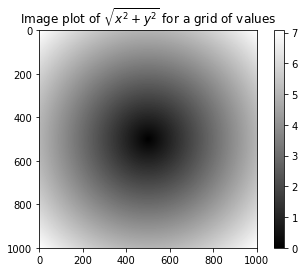

In [97]:
#使用matplotlib创建这个二维数组的可视化：
import matplotlib.pyplot as plt
plt.imshow(z,cmap = plt.cm.gray);plt.colorbar();plt.title("Image plot of $\sqrt{x^2+y^2}$ for a grid of values")

In [99]:
#将条件逻辑表述为数组运算：
#numpy.where函数是三元表达式x if condition else y的矢量化版本
xarr = np.array([1.1,1.2,1.3,1.4,1.5])
yarr = np.array([2.1,2.2,2.3,2.4,2.5])
cond = np.array([True,False,True,True,False])
#假设想要根据cond中的值选取xarr和yarr的值：当cond中的值为True时，选取xarr的值，否则从yarr中选取：
result = [(x if c else y) for x,y,c in zip(xarr,yarr,cond)]
result

[1.1, 2.2, 1.3, 1.4, 2.5]

In [100]:
#谁用np.where速度更快，也更简洁
result = np.where(cond,xarr,yarr)
result

array([1.1, 2.2, 1.3, 1.4, 2.5])

In [101]:
#将所有的正值替换为2，所有的负值替换为-2
arr = np.random.randn(4,4)
arr

array([[-0.41773707, -1.09169083, -1.5541185 ,  0.15082605],
       [-1.29590448, -0.22943763,  1.53946971,  1.17647501],
       [-0.05846257,  0.99871702,  0.75870809, -0.67035879],
       [ 1.07021756, -2.2603773 , -1.11557366,  0.83838723]])

In [102]:
arr >0

array([[False, False, False,  True],
       [False, False,  True,  True],
       [False,  True,  True, False],
       [ True, False, False,  True]])

In [103]:
np.where(arr>0,2,-2)

array([[-2, -2, -2,  2],
       [-2, -2,  2,  2],
       [-2,  2,  2, -2],
       [ 2, -2, -2,  2]])

In [104]:
np.where(arr>0,2,arr)

array([[-0.41773707, -1.09169083, -1.5541185 ,  2.        ],
       [-1.29590448, -0.22943763,  2.        ,  2.        ],
       [-0.05846257,  2.        ,  2.        , -0.67035879],
       [ 2.        , -2.2603773 , -1.11557366,  2.        ]])

In [105]:
#数学和统计方法
arr = np.random.randn(5,4)
arr

array([[ 0.60540688, -1.09091379, -0.37523948,  0.51041726],
       [ 2.30578129, -0.50368986,  0.02645132,  0.04256595],
       [-1.18793491, -1.24640281, -1.31108578, -0.60373232],
       [ 1.32979385,  1.41044847, -1.1435997 ,  1.75421012],
       [-0.97703456,  1.03132016, -0.1180637 , -0.76433505]])

In [106]:
arr.mean()

-0.015281831906433263

In [107]:
np.mean(arr)

-0.015281831906433263

In [108]:
arr.sum()

-0.30563663812866526

In [109]:
#axis=1:计算行的平均值；axis=0：计算每列的和
arr.mean(axis=1)

array([-0.08758228,  0.46777718, -1.08728895,  0.83771318, -0.20702829])

In [110]:
arr.sum(axis=0)

array([ 2.07601256, -0.39923782, -2.92153734,  0.93912596])

In [115]:
#累加函数
arr1 = np.array([0,1,2,3,5,6,7])
arr1.cumsum()

array([ 0,  1,  3,  6, 11, 17, 24], dtype=int32)

In [117]:
arr = np.random.randn(5,4)
arr

array([[-0.08714748,  1.15920333,  3.43253672, -1.89911706],
       [-1.9282764 ,  0.11813749,  0.70539832,  0.66476647],
       [ 0.58108498,  0.23602848,  0.43920306, -0.67196565],
       [-0.75695082, -0.07477582, -0.16043156, -0.80638253],
       [ 1.20702886, -0.84055364,  0.67081778, -0.51869709]])

In [118]:
arr.cumsum(axis = 0)

array([[-0.08714748,  1.15920333,  3.43253672, -1.89911706],
       [-2.01542388,  1.27734082,  4.13793504, -1.23435059],
       [-1.43433889,  1.5133693 ,  4.5771381 , -1.90631624],
       [-2.19128971,  1.43859348,  4.41670654, -2.71269877],
       [-0.98426086,  0.59803984,  5.08752433, -3.23139586]])

In [119]:
arr.cumsum(axis = 1)

array([[-0.08714748,  1.07205585,  4.50459257,  2.60547552],
       [-1.9282764 , -1.8101389 , -1.10474059, -0.43997412],
       [ 0.58108498,  0.81711346,  1.25631652,  0.58435087],
       [-0.75695082, -0.83172664, -0.9921582 , -1.79854073],
       [ 1.20702886,  0.36647522,  1.037293  ,  0.51859591]])

In [122]:
#用于布尔型数组的方法
(arr > 0).sum()

10

In [123]:
#all检查数组中所有值是否为True，any检查数组中是否存在一个或多个True
bools = np.array([False,False,True,False])
bools.any()

True

In [124]:
bools.all()

False

In [130]:
#排序
arr =np.random.randn(6)
arr

array([-0.48185737,  1.96137623, -2.56500223,  1.2420829 , -0.61360993,
        0.67284589])

In [132]:
arr.sort()
arr

array([-2.56500223, -0.61360993, -0.48185737,  0.67284589,  1.2420829 ,
        1.96137623])

In [134]:
arr =np.random.randn(6,5)
arr

array([[ 3.03926734,  0.36701998,  0.32176198, -1.10736681,  0.70610918],
       [-1.48833982,  0.48230972, -0.45987426, -0.81665376, -0.45099442],
       [-1.08179539, -0.9075303 ,  0.16937504, -0.51316827,  1.93435245],
       [-0.2351283 ,  0.77312925,  1.61357798,  0.75000907, -0.69961677],
       [ 2.17783642, -0.83602507,  0.81536928, -0.70574849, -0.21685034],
       [ 0.25107236, -1.28455853,  0.08719742, -0.61462412, -1.39243227]])

In [136]:
arr.sort(1)
arr

array([[-1.10736681,  0.32176198,  0.36701998,  0.70610918,  3.03926734],
       [-1.48833982, -0.81665376, -0.45987426, -0.45099442,  0.48230972],
       [-1.08179539, -0.9075303 , -0.51316827,  0.16937504,  1.93435245],
       [-0.69961677, -0.2351283 ,  0.75000907,  0.77312925,  1.61357798],
       [-0.83602507, -0.70574849, -0.21685034,  0.81536928,  2.17783642],
       [-1.39243227, -1.28455853, -0.61462412,  0.08719742,  0.25107236]])

In [138]:
large_arr = np.random.randn(1000)
large_arr.sort()
large_arr[int(0.05*len(large_arr))] #5% quantile

-1.6157342223892193

In [140]:
names = np.array(['Bob','Joe','Will','Bob','Will','Joe','Joe'])
np.unique(names)

array(['Bob', 'Joe', 'Will'], dtype='<U4')

In [141]:
ints = np.array([3,3,3,2,2,1,1,4,4])
np.unique(ints)

array([1, 2, 3, 4])

In [142]:
names = np.array(['Bob','Will','Joe'])
sorted(set(names))

['Bob', 'Joe', 'Will']

In [144]:
np.in1d(ints,[2,3,6])

array([ True,  True,  True,  True,  True, False, False, False, False])

In [145]:
#4.4用于数组的文件输入输出
arr =np.arange(10)
np.save('some_array',arr)

In [146]:
np.load('some_array.npy')

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [149]:
#将多个数组保存到一个未压缩文件中，将数组以关键字参数的形式传入即可：
np.savez('array_archive.npz',a =  arr,b = arr)
arch = np.load('array_archive.npz')
arch['b']

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [150]:
#4.5线性代数
x = np.array([[1.,2.,3.],[4.,5.,6.]])
y = np.array([[6.,23.],[-1,7],[8,9]])
x

array([[1., 2., 3.],
       [4., 5., 6.]])

In [151]:
y

array([[ 6., 23.],
       [-1.,  7.],
       [ 8.,  9.]])

In [152]:
x.dot(y)

array([[ 28.,  64.],
       [ 67., 181.]])

In [153]:
np.dot(x,y)

array([[ 28.,  64.],
       [ 67., 181.]])

In [154]:
np.ones(3)

array([1., 1., 1.])

In [155]:
np.dot(x,np.ones(3))

array([ 6., 15.])

In [156]:
#@也可以用作中缀运算符，进行矩阵乘法：
x@np.ones(3)

array([ 6., 15.])

In [158]:
from numpy.linalg import inv,qr
X = np.random.randn(5,5)
mat = X.T.dot(X)
inv(mat)

array([[ 6.42464743e+01, -7.12636569e+00, -5.74599094e-01,
         1.98091525e+01,  4.78588533e+01],
       [-7.12636569e+00,  8.83407260e-01,  3.18048081e-03,
        -2.16294358e+00, -5.26417061e+00],
       [-5.74599094e-01,  3.18048081e-03,  1.39333834e+00,
        -8.46406189e-01, -1.58015757e+00],
       [ 1.98091525e+01, -2.16294358e+00, -8.46406189e-01,
         6.59073939e+00,  1.54105561e+01],
       [ 4.78588533e+01, -5.26417061e+00, -1.58015757e+00,
         1.54105561e+01,  3.68744404e+01]])

In [159]:
mat.dot(inv(mat))

array([[ 1.00000000e+00,  3.31818113e-16, -3.29872452e-16,
         8.31756788e-15,  1.08010417e-14],
       [-6.09421731e-16,  1.00000000e+00,  4.49619902e-17,
         1.75035835e-15,  1.18246166e-15],
       [-4.05268566e-14, -2.15028657e-15,  1.00000000e+00,
         1.80861443e-15, -1.33197492e-14],
       [-1.51917514e-14,  4.12343178e-16, -1.92217470e-17,
         1.00000000e+00, -5.89452494e-15],
       [-1.37508833e-14, -3.81473491e-16,  2.82442500e-16,
        -3.74072096e-16,  1.00000000e+00]])

In [160]:
q,r = qr(mat)
r

array([[ -4.24421161,  -2.83436444,   4.64804437,  -0.19415035,
          5.40095051],
       [  0.        , -10.87718935,  -1.79329025,   1.3062872 ,
         -2.18116745],
       [  0.        ,   0.        ,  -1.48359116,  -7.98396197,
          3.28459595],
       [  0.        ,   0.        ,   0.        ,  -3.45555758,
          1.43817181],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.01597622]])

In [161]:
#伪随机数生成
samples = np.random.normal(size = (4,4))
samples

array([[-0.04055041,  0.43078599,  1.74835762,  0.61611753],
       [ 1.99712588,  1.23394029, -0.00680052, -1.05758999],
       [ 2.80291445,  1.35418103,  1.50549745, -0.0342281 ],
       [ 1.68591769,  0.63994901,  1.44426045, -1.78062861]])

In [162]:
from random import normalvariate
N = 1000000
%timeit samples = [normalvariate(0,1) for _ in range(N)]

826 ms ± 15.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [163]:
%timeit np.random.normal(size=N)

31.2 ms ± 292 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [164]:
#随机漫步
import random
position = 0
walk = [position]
steps = 1000
for i in range(steps):
    step = 1 if random.randint(0,1) else -1
    position +=step
    walk.append(position)

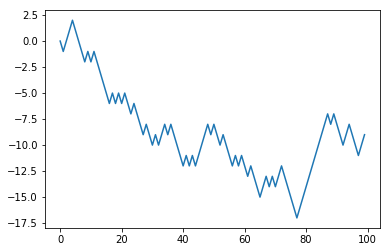

In [166]:
plt.plot(walk[:100])

In [167]:
nsteps = 1000
draws = np.random.randint(0,2,size=nsteps)
steps = np.where(draws>0,1,-1)
walk = steps.cumsum()

In [168]:
walk.min()

-27

In [169]:
walk.max()

12

In [170]:
#一次模拟多个随机漫步
nwalks = 5000
nsteps = 1000
draws = np.random.randint(0,2,size=(nwalks,nsteps)) #0,1
steps = np.where(draws>0,1,-1)
walks = steps.cumsum(1)
walks

array([[  1,   0,   1, ..., -12, -11, -12],
       [ -1,  -2,  -3, ...,  30,  31,  32],
       [ -1,  -2,  -3, ..., -10, -11, -10],
       ...,
       [ -1,  -2,  -3, ..., -26, -25, -26],
       [ -1,   0,   1, ...,  26,  27,  26],
       [ -1,  -2,  -3, ...,  14,  13,  14]], dtype=int32)

In [171]:
#随机漫步的最大值和最小值
walks.max()

126

In [172]:
walks.min()

-123

In [174]:
#计算30或-30的最小穿越时间
hits30 = (np.abs(walks) >=30).any(1)
hits30

array([False,  True, False, ...,  True,  True, False])

In [175]:
hits30.sum()

3386

In [176]:
#选出穿越了30（绝对值）的随机漫步，并调用argmax在轴1上获取穿越时间：
crossing_times = (np.abs(walks[hits30]) >= 30).argmax(1)
crossing_times.mean()

502.2740696987596

In [178]:
steps = np.random.normal(loc = 0,scale =0.25,size = (nwalks,nsteps))
steps

array([[-0.17729375, -0.10914962, -0.23047736, ...,  0.23797654,
         0.08637597, -0.08671359],
       [ 0.40211535, -0.1751715 ,  0.46895854, ...,  0.40876172,
        -0.17340957,  0.0998522 ],
       [ 0.0027536 , -0.11441397,  0.0908799 , ..., -0.40307387,
         0.00556194, -0.39965451],
       ...,
       [-0.19272621,  0.07386667, -0.06363023, ...,  0.36150402,
        -0.40245583, -0.35548837],
       [-0.33593793,  0.06625843, -0.16643775, ..., -0.36625193,
        -0.25485656, -0.42573872],
       [-0.3170784 ,  0.36643193,  0.30092787, ...,  0.06532124,
         0.35861198, -0.01558005]])